In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import xarray as xr
import os
import calendar
import string
%matplotlib inline

In [2]:
# figure root
fig_root = os.environ['HOME']+'/work/cmip6/E3SM'
save_fig = True

In [3]:
# set esgf
esgf_root = '/Volumes/LaCie/data/cmip6/esgf/sea_ice'
# list of models
sourceid_list = [
                'ACCESS-CM2',
                'ACCESS-ESM1-5',
                'CESM2',
                'CESM2-WACCM',
                'CNRM-CM6-1',
                'CNRM-CM6-1-HR',
                'INM-CM4-8',
                'INM-CM5-0',
                'IPSL-CM6A-LR',
                'MPI-ESM1-2-HR',
                'MPI-ESM1-2-LR',
                'MRI-ESM2-0',
                'NorESM2-LM',
                'NorESM2-MM',
                ]
# list of variant
# “r” for realization, “i” for initialization, “p” for physics, and “f” for forcing
variantlb_list = [
                 'r1i1p1f1',
                 'r1i1p1f1',
                 'r1i1p1f1',
                 'r1i1p1f1',
                 'r1i1p1f2',
                 'r1i1p1f2',
                 'r1i1p1f1',
                 'r1i1p1f1',
                 'r1i1p1f1',
                 'r1i1p1f1',
                 'r1i1p1f1',
                 'r1i1p1f1',
                 'r1i1p1f1',
                 'r1i1p1f1',
                 ]
# list of variables
var_list = ['siarean', 'siareas', 'sivoln', 'sivols']
# model component
realm = 'SI'
# output frequency
freq = 'mon'
# scenario
expid = 'ssp585'


In [4]:
# load esgf data
nsource = len(sourceid_list)
nvariant = len(variantlb_list)
assert nsource == nvariant, 'Variant label list is not compatible with source id list.'
nvar = len(var_list)
f_init = False
for i in np.arange(nsource):
    for j in np.arange(nvar):
        infile_prefix = var_list[j]+'_'+realm+freq+'_'+sourceid_list[i]+'_'+expid+'_'+variantlb_list[i]
        print(infile_prefix)
        infile_list = [esgf_root+'/'+filename \
                       for filename in os.listdir(esgf_root) if filename.startswith(infile_prefix)]
        ninfile = len(infile_list)
        if ninfile > 0:
            print('Opening {:d} files...'.format(len(infile_list)))
            dset = xr.open_mfdataset(infile_list, combine='by_coords')
            if not f_init:
                esgf_time = dset.time
                esgf_ntime = esgf_time.size
                esgf_data = np.zeros([nvar, nsource, esgf_ntime])
                f_init = True
            esgf_data[j,i,:] = dset.variables[var_list[j]][:].squeeze()
        else:
            print('File with prefix \'{:s}\' not found. Skipping.'.format(infile_prefix))
            esgf_data[j,i,:] = np.nan

siarean_SImon_ACCESS-CM2_ssp585_r1i1p1f1
Opening 1 files...
siareas_SImon_ACCESS-CM2_ssp585_r1i1p1f1
Opening 1 files...
sivoln_SImon_ACCESS-CM2_ssp585_r1i1p1f1
Opening 1 files...
sivols_SImon_ACCESS-CM2_ssp585_r1i1p1f1
Opening 1 files...
siarean_SImon_ACCESS-ESM1-5_ssp585_r1i1p1f1
Opening 1 files...
siareas_SImon_ACCESS-ESM1-5_ssp585_r1i1p1f1
Opening 1 files...
sivoln_SImon_ACCESS-ESM1-5_ssp585_r1i1p1f1
Opening 1 files...
sivols_SImon_ACCESS-ESM1-5_ssp585_r1i1p1f1
Opening 1 files...
siarean_SImon_CESM2_ssp585_r1i1p1f1
Opening 2 files...


/Users/qingli/miniconda3/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'siarean' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/qingli/miniconda3/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'siareas' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  use_cftime=use_cftime,


siareas_SImon_CESM2_ssp585_r1i1p1f1
Opening 2 files...
sivoln_SImon_CESM2_ssp585_r1i1p1f1
Opening 2 files...


/Users/qingli/miniconda3/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'sivoln' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/qingli/miniconda3/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'sivols' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  use_cftime=use_cftime,


sivols_SImon_CESM2_ssp585_r1i1p1f1
Opening 2 files...
siarean_SImon_CESM2-WACCM_ssp585_r1i1p1f1
Opening 1 files...


/Users/qingli/miniconda3/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'siarean' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/qingli/miniconda3/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'siareas' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  use_cftime=use_cftime,


siareas_SImon_CESM2-WACCM_ssp585_r1i1p1f1
Opening 1 files...
sivoln_SImon_CESM2-WACCM_ssp585_r1i1p1f1
Opening 1 files...


/Users/qingli/miniconda3/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'sivoln' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/qingli/miniconda3/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'sivols' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  use_cftime=use_cftime,


sivols_SImon_CESM2-WACCM_ssp585_r1i1p1f1
Opening 1 files...
siarean_SImon_CNRM-CM6-1_ssp585_r1i1p1f2
Opening 1 files...
siareas_SImon_CNRM-CM6-1_ssp585_r1i1p1f2
Opening 1 files...
sivoln_SImon_CNRM-CM6-1_ssp585_r1i1p1f2
Opening 1 files...
sivols_SImon_CNRM-CM6-1_ssp585_r1i1p1f2
Opening 1 files...
siarean_SImon_CNRM-CM6-1-HR_ssp585_r1i1p1f2
Opening 1 files...
siareas_SImon_CNRM-CM6-1-HR_ssp585_r1i1p1f2
Opening 1 files...
sivoln_SImon_CNRM-CM6-1-HR_ssp585_r1i1p1f2
Opening 1 files...
sivols_SImon_CNRM-CM6-1-HR_ssp585_r1i1p1f2
Opening 1 files...
siarean_SImon_INM-CM4-8_ssp585_r1i1p1f1
Opening 1 files...
siareas_SImon_INM-CM4-8_ssp585_r1i1p1f1
Opening 1 files...
sivoln_SImon_INM-CM4-8_ssp585_r1i1p1f1
File with prefix 'sivoln_SImon_INM-CM4-8_ssp585_r1i1p1f1' not found. Skipping.
sivols_SImon_INM-CM4-8_ssp585_r1i1p1f1
File with prefix 'sivols_SImon_INM-CM4-8_ssp585_r1i1p1f1' not found. Skipping.
siarean_SImon_INM-CM5-0_ssp585_r1i1p1f1
Opening 1 files...
siareas_SImon_INM-CM5-0_ssp585_r1i1p1f1

In [5]:
# fix the error in units...

# ice volume for MPI-ESM1-2-HR and MPI-ESM1-2-LR 
esgf_data[2:,9:11] /=1e12
# ice volume for NorESM2-LM and NorESM2-MM 
esgf_data[2:,12:] /=1e3

In [6]:
# set e3sm
e3sm_root = '/Volumes/LaCie/data/cmip6/e3sm'
e3smcase_list = [
                '20190807.DECKv1b_P1_SSP5-8.5.ne30_oEC.cori-knl',
                '20190821.DECKv1b_P2_SSP5-8.5.ne30_oEC.cori-knl',
                '20190821.DECKv1b_P3_SSP5-8.5.ne30_oEC.cori-knl',
                ]
var_list = ['iceArea', 'iceArea', 'iceVolume', 'iceVolume']
convert_m2km = [1e12, 1e12, 1e12, 1e12]
file_list = ['seaIceAreaVolNH.nc', 'seaIceAreaVolSH.nc', 'seaIceAreaVolNH.nc', 'seaIceAreaVolSH.nc']
            

In [7]:
# load e3sm data
ne3smcase = len(e3smcase_list)
f_init = False
for i in np.arange(ne3smcase):
    for j in np.arange(nvar):
        infile = e3sm_root+'/mpas_analysis/'+e3smcase_list[i]+'/timeseries/'+file_list[j]
        print('Opening file {:}...'.format(infile))
        dset = xr.open_dataset(infile)
        if not f_init:
            e3sm_time = dset.Time
            e3sm_ntime = e3sm_time.size
            e3sm_data = np.zeros([nvar, ne3smcase, e3sm_ntime])
            f_init = True
        ntime = dset.Time.size
        e3sm_data[j,i,0:ntime] = dset.variables[var_list[j]][0:]/convert_m2km[j]
        if ntime < e3sm_ntime:
            e3sm_data[j,i,ntime:] = np.nan

Opening file /Volumes/LaCie/data/cmip6/e3sm/mpas_analysis/20190807.DECKv1b_P1_SSP5-8.5.ne30_oEC.cori-knl/timeseries/seaIceAreaVolNH.nc...
Opening file /Volumes/LaCie/data/cmip6/e3sm/mpas_analysis/20190807.DECKv1b_P1_SSP5-8.5.ne30_oEC.cori-knl/timeseries/seaIceAreaVolSH.nc...
Opening file /Volumes/LaCie/data/cmip6/e3sm/mpas_analysis/20190807.DECKv1b_P1_SSP5-8.5.ne30_oEC.cori-knl/timeseries/seaIceAreaVolNH.nc...
Opening file /Volumes/LaCie/data/cmip6/e3sm/mpas_analysis/20190807.DECKv1b_P1_SSP5-8.5.ne30_oEC.cori-knl/timeseries/seaIceAreaVolSH.nc...
Opening file /Volumes/LaCie/data/cmip6/e3sm/mpas_analysis/20190821.DECKv1b_P2_SSP5-8.5.ne30_oEC.cori-knl/timeseries/seaIceAreaVolNH.nc...
Opening file /Volumes/LaCie/data/cmip6/e3sm/mpas_analysis/20190821.DECKv1b_P2_SSP5-8.5.ne30_oEC.cori-knl/timeseries/seaIceAreaVolSH.nc...
Opening file /Volumes/LaCie/data/cmip6/e3sm/mpas_analysis/20190821.DECKv1b_P2_SSP5-8.5.ne30_oEC.cori-knl/timeseries/seaIceAreaVolNH.nc...
Opening file /Volumes/LaCie/data/c

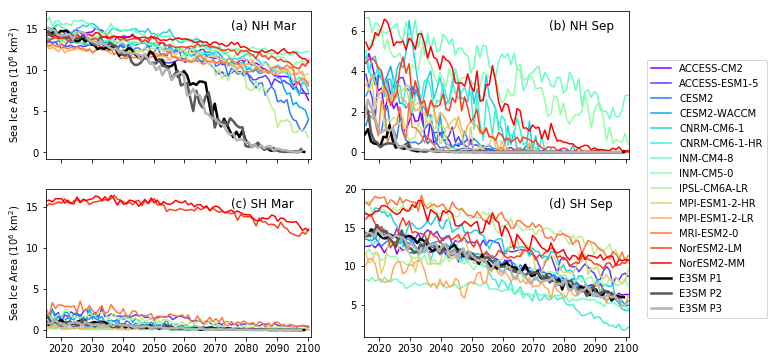

In [8]:
cmap = cm.get_cmap('rainbow')
ifrac = np.linspace(0,1,nsource)
cmap2 = cm.get_cmap('gray')
ifrac2 = np.linspace(0,0.7,ne3smcase)

fig, axarr = plt.subplots(2,2, sharex='col' )
fig.set_size_inches(12, 6)
imon_list = [2, 8]
ivar_list = [0, 1]
label_ns = ['NH', 'SH']
for i,imon in enumerate(imon_list):
    for j,ivar in enumerate(ivar_list):
        alphabet = string.ascii_lowercase[j*2+i]
        for k in np.arange(nsource):
            axarr[j,i].plot(esgf_time[imon::12], esgf_data[ivar,k,imon::12], \
                            color=cmap(ifrac[k]), label=sourceid_list[k])
            if i == 0:
                axarr[j,i].set_ylabel('Sea Ice Area ($10^6$ km$^2$)')
        axarr[j,i].text(0.7, 0.85, '('+alphabet+') '+label_ns[j]+' '+calendar.month_abbr[imon+1], \
                        transform=axarr[j,i].transAxes, \
                        fontsize=12, color='k', va='bottom')
        for k in np.arange(ne3smcase):
            axarr[j,i].plot(e3sm_time[imon::12], e3sm_data[ivar,k,imon::12], \
                            color=cmap2(ifrac2[k]), linewidth=2.5, label='E3SM P{:d}'.format(k+1))
        axarr[j,i].set_xlim([esgf_time[0], esgf_time[-1]])
axarr[1,1].legend(loc='center left', bbox_to_anchor=(1.05, 1.))

# save figure
if save_fig:
    plt.subplots_adjust(right=0.8)
    figname = fig_root+'/CMIP6_ScenarioMIP_SeaIceArea.png'
    fig.savefig(figname, dpi = 300)

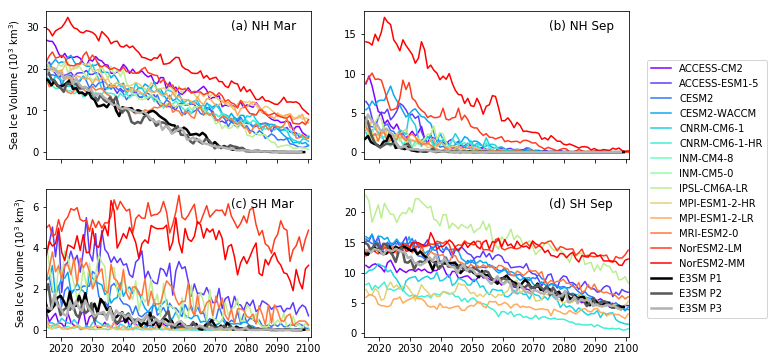

In [9]:
cmap = cm.get_cmap('rainbow')
ifrac = np.linspace(0,1,nsource)
cmap2 = cm.get_cmap('gray')
ifrac2 = np.linspace(0,0.7,ne3smcase)

fig, axarr = plt.subplots(2,2, sharex='col' )
fig.set_size_inches(12, 6)
imon_list = [2, 8]
ivar_list = [2, 3]
label_ns = ['NH', 'SH']
for i,imon in enumerate(imon_list):
    for j,ivar in enumerate(ivar_list):
        alphabet = string.ascii_lowercase[j*2+i]
        for k in np.arange(nsource):
            axarr[j,i].plot(esgf_time[imon::12], esgf_data[ivar,k,imon::12], \
                            color=cmap(ifrac[k]), label=sourceid_list[k])
            if i == 0:
                axarr[j,i].set_ylabel('Sea Ice Volume ($10^3$ km$^3$)')
        axarr[j,i].text(0.7, 0.85, '('+alphabet+') '+label_ns[j]+' '+calendar.month_abbr[imon+1], \
                        transform=axarr[j,i].transAxes, \
                        fontsize=12, color='k', va='bottom')
        for k in np.arange(ne3smcase):
            axarr[j,i].plot(e3sm_time[imon::12], e3sm_data[ivar,k,imon::12], \
                            color=cmap2(ifrac2[k]), linewidth=2.5, label='E3SM P{:d}'.format(k+1))
        axarr[j,i].set_xlim([esgf_time[0], esgf_time[-1]])
axarr[1,1].legend(loc='center left', bbox_to_anchor=(1.05, 1.))

# save figure
if save_fig:
    plt.subplots_adjust(right=0.8)
    figname = fig_root+'/CMIP6_ScenarioMIP_SeaIceVolume.png'
    fig.savefig(figname, dpi = 300)